# Practice Session : Kalman Filter

In this session, we will code our own Kalman filter and try to study and apply it on simulated data. The first part is dedicated to code a Linear Gaussian Model simulator while the Second Part is about coding the Kalman Filter.

Instructions:
- Can be send in pairs or alone
- You can either complete the notebook by your own and send it under the name `Kalman_Practice-Session [NAMES].ipynb` where `[NAMES]` stands for your family name(s) or  `pdf` is fine.

## 1 - Linear Gaussian Model (LGM) Simulation

Let's consider at first the following Linear Gaussian Model (LGM) :

$$
\begin{cases}
X_0 \sim \mathcal{N}(m_0,P_0) \\
X_{k+1} = \Phi X_k + \epsilon_k\\
Y_{k+1} = \Psi X_{k+1} + \eta_{k+1} \\
\epsilon_k \sim \mathcal{N}(0,Q) \\
\eta_k \sim \mathcal{N}(0, R) 

\end{cases}\qquad \qquad \qquad (1)
$$

where the entries $X_0, (\epsilon_k)_{k\geq 0}, (\eta_k)_{k\geq 0}$ are independents.

The code hereafter generate $(X_{k+1}, Y_{k+1})$ knowning $X_k$.

In [98]:
import numpy as np
import matplotlib.pyplot as plt

def lingauss_step(x_current, Phi, Psi, Q, R):
    """
    Generate (X_{k+1}, Y_{k+1}) in the linear Gaussian model.
    Arguments:
    Phi, Psi: matrices defining the state dynamics and observation model (of sizes (p,p) and (q,p) respectively)
    Q, R: variances of the noise for the state equation and observation equation.
    x_current: vector of size p
    Returns:
    x: a column vector (dimensions (p,1))
    y: a column vector (dimensions (q,1))
    """
    dim_state = len(x_current)
    dim_obs = Psi.shape[0]
    x_current = np.reshape(x_current, (dim_state, 1))
    mean_state = np.dot(Phi, x_current)
    x = my_mvnormrnd(mean_state, Q, 1)
    x = np.reshape(x, (dim_state, 1))
    mean_obs = np.dot(Psi, x)
    y = my_mvnormrnd(mean_obs, R, 1)
    y = np.reshape(y, (dim_obs, 1))
    return x, y

def my_mvnormrnd(mean, cov, num_samples):
    """
    Generate samples from a multivariate normal distribution.
    mean: mean vector
    cov: covariance matrix
    num_samples: number of samples to generate
    Returns:
    samples: generated samples
    """
    samples = np.random.multivariate_normal(mean.flatten(), cov, num_samples).T
    return samples


# # Define parameters
x_0 = np.array([[1], [2], [3]])
Phi = 0.1 * np.array([[1, 1, 0], [0, 1, 1], [0, 0, 1]])
Psi = np.array([[1, 0, 0], [0, 1, 1]])
cholQ = np.array([[0.5, 0.5, 0.5], [0, 1, 1], [0, 0, 1]])
Q = np.dot(cholQ, cholQ.T)
cholR = 0.5 * np.array([[1, 1], [0, 2]])
R = np.dot(cholR, cholR.T)

# Perform one iteration in the model
x, y = lingauss_step(x_0, Phi, Psi, Q, R)
print("x:", x)
print("y:", y)

x: [[-0.89154616]
 [-2.53823492]
 [-0.04883237]]
y: [[-0.97297841]
 [-2.44300024]]


The function `lingauss_simul` is made to generate sample $(X_k, Y_k)_{k=1}^{T}$ for a fixed $T$ and given $x_0$.

In [99]:
def lingauss_simul(x_0, T, Phi, Psi, Q, R):
    """
    Generate the process ((X_{k}, Y_{k}), k = 1:T) in the linear Gaussian model.
    Arguments:
    Phi, Psi: Matrices defining the state dynamics and observation model (of sizes resp. (p,p) and (q,p))
    Q, R: Variances of the noise for the state equation and observation equation.
    x_0: Initial state
    T: Number of iterations
    Returns:
    X: a matrix of size (T,p)
    Y: a matrix of size (T,q)
    """
    dim_state = Phi.shape[0]
    dim_obs = Psi.shape[0]
    X = np.zeros((T, dim_state))
    Y = np.zeros((T, dim_obs))
    x = x_0

    for i in range(T):
        x, y = lingauss_step(x, Phi, Psi, Q, R)
        X[i, :] = x.flatten()
        Y[i, :] = y.flatten()

    return X, Y
x,y=lingauss_simul(x_0, 5, Phi, Psi, Q, R)
print("X:", x)
print("Y:", y)

X: [[ 0.22476157 -0.29413352  0.54439822]
 [ 0.45876311  0.00502568  0.92540103]
 [ 0.07502403  1.14736527  0.15155208]
 [-0.62061408 -0.72795426 -0.89559874]
 [ 0.2892314  -0.26085965  0.52444201]]
Y: [[ 0.80560003 -0.15339688]
 [ 0.87250438  1.83505277]
 [-1.13740508  1.30563836]
 [-0.89989448 -2.02033489]
 [ 0.41933652  0.28565562]]


1. <span style="font-weight:bold;">Application :</span> We consider states $X_{k}=(X_{k,1}, X_{k,2}, X_{k,3})$ and observation $Y_{k} = (Y_{k,1}, Y_{k,2})$ with $i \in \{1,2,3\}$ and $j \in \{1,2\}$:

\begin{cases}
X_{k+1, i} = X_{k,i} + \epsilon_{k,i} & \text{with } \epsilon_{k,i} \sim \mathcal{N}(0,\tau^2) \\
Y_{k+1, j} = X_{k+1,j} + \eta_{k, j} & \text{with } \eta_{k,j} \sim \mathcal{N}(0,\sigma^2)
\end{cases} \qquad \qquad \qquad (2)
<span style="font-weight:bold; color:red;">Answer the following questions:</span><br>
    1.1 Write the model in Eq. (2) under the form of Eq. (1) by specifying the parameters $\Phi, \Psi, Q$ and $R$.<br>
    1.2 Complete the following code to show trajectory of $T=100$ observations at first. Comment.<br>
    1.3 Varying the paramters $\sigma,\tau $ and $T$ and comment the results.<br>

1.1) On a :
$$
\begin{cases}
X_0 \sim \mathcal{N}(m_0,P_0) \\
X_{k+1} = \Phi X_k + \epsilon_k\\
Y_{k+1} = \Psi X_{k+1} + \eta_{k+1} \\
\epsilon_k \sim \mathcal{N}(0,Q) \\
\eta_k \sim \mathcal{N}(0, R) 

\end{cases}

$$

avec :
$$
\begin{cases}

\Phi =
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix} \\
\Psi =
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 
\end{bmatrix} \\
Q=
\begin{bmatrix}
\tau^2 & 0 & 0 \\
0 & \tau^2 & 0 \\
0 & 0 & \tau^2
\end{bmatrix} \\

R=
\begin{bmatrix}
\sigma^2 & 0  \\
0 & \sigma^2 
\end{bmatrix} 



\end{cases}
$$

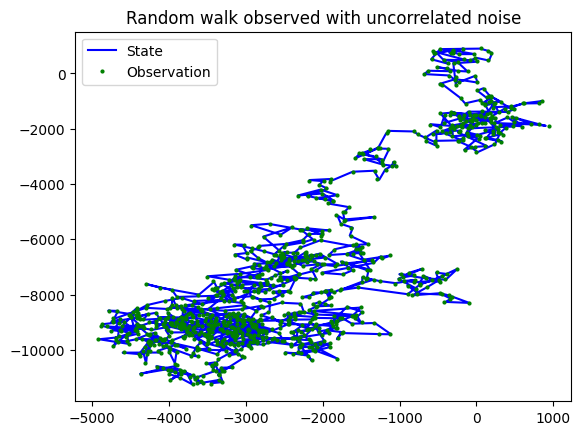

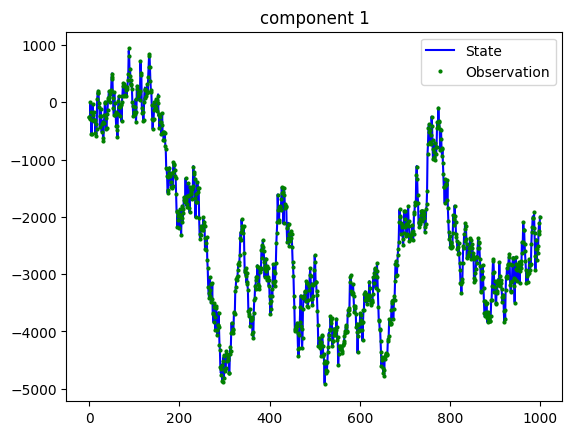

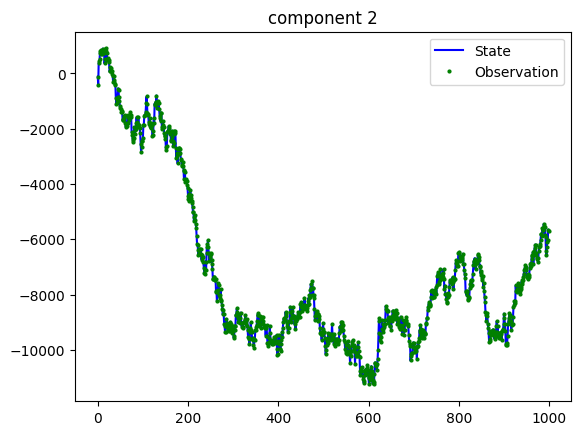

In [100]:
# A-1 parameters to modify
sigma = 10
tau = 200
x_0 = np.array([1, 2, -1])
T = 1000
# A-2 structural parameters
Phi = np.array([[1,0,0],[0,1,0],[0,0,1]])  # Replace with appropriate matrix for state model
Psi = np.array([[1,0,0],[0,1,0]])  # Replace with appropriate matrix for observation model
Q = np.array([[tau**2,0,0],[0,tau**2,0],[0,0,tau**2]])  # Replace with appropriate covariance matrix for state equation
R = np.array([[sigma**2,0],[0,sigma**2]]) # Replace with appropriate covariance matrix for observation equation


# Perform simulation
X, Y = lingauss_simul(x_0, T, Phi, Psi, Q, R)

# Visualization
plt.figure(1)
plt.plot(X[:, 0], X[:, 1], 'b', label='State')
plt.plot(Y[:, 0], Y[:, 1], 'og', label='Observation', markersize=2)
plt.legend()
plt.title('Random walk observed with uncorrelated noise')
plt.show()

for i in range(2):
    plt.figure(i+2)
    plt.plot(X[:, i], 'b', label='State')
    plt.plot(Y[:, i], 'og', label='Observation', markersize=2)
    plt.title(f'component {i+1}')
    plt.legend()
    plt.show()

1.2) 
L'état suit une marche aléatoire en 3 dimensions dont seules les 2premières composantes sont observées, les observations (points verts) sont des des versions bruitées de l'état réel (trait bleu). Pour T=100 on observe des décalages faibles entre les observations et l'état réel.

1.3)
En augmentant T, on observe juste des tendances à plus long termes de la marche aléatoire : une concentration du graphe, de plus avec plus d'itération, le décalage entre observations et état réel paraît plus faible (en moyenne proportionnelement). \
Augmenter $\tau $ fait varier beaucoup plus rapidement la marche aléatoire qui devient plus imprévisible : le graphe et les valeurs prises par la marche aléatoire sont plus dispersés. \
L'augmentation de $\sigma$ aggrandit le décalage entre le les observations et l'état réel, cela rend l'estimation plus difficile.

# 2 - Kalman Filter
Let's code what we saw before [here](https://matfontaine.github.io/KALMAN/#/11). The two first line are called *the predictions* whereas 3., 4. and 5. are called *the updates*.

2.1. Complete the function `kalman_predict`

In [101]:
def kalman_predict(m, P, Phi, Q):
    """
    Perform the prediction step in the Kalman filter.
    Calculates the predictive distribution [X_{k+1} | Y_{1:k}].
    Arguments:
    m, P: mean and variance of the current filtering distribution (vector and matrix of size p respectively)
    Phi: p*p matrix defining the state dynamics
    Q: variance of the noise (p*p matrix) for the state equation
    Returns:
    mpred: column vector of size p * 1: mean of the predictive distribution.
    Ppred: p*p matrix: covariance of the predictive distribution.
    """
    dim_state = m.shape[0]
    m = np.reshape(m, (dim_state, 1))

    # Predicted mean
    mpred = np.dot(Phi,m) # TO COMPLETE

    # Predicted covariance matrix
    Ppred = np.dot(np.dot(Phi,P),Phi.T) + Q # TO COMPLETE

    return mpred, Ppred

2.2. Complete the function `kalman_update`  ($S_t$ corresponds to $\Psi_t\Sigma_{t \mid t_-1} \Psi_t^\top + R$ in the given notation. It is called the *innovation covariance*)

In [102]:
def kalman_update(y, mpred, Ppred, Phi, Psi, Q, R):
    """
    Kalman update step:
    Arguments:
    mpred, Ppred: mean and variance of the current predictive distribution (returned by 'kalman_predict')
    y: vector of size q: new observation
    Phi, Psi: Matrices p*p and q*p defining the state dynamics and observation model
    Q, R: Variances of the noise for the state equation and observation equation of sizes p and q respectively
    Returns:
    mu, Pu: mean and covariance matrix of the filtering distribution after the update step
    """
    dim_state = Phi.shape[0]
    dim_obs = Psi.shape[0]

    # Measurement residual (can be used to update mu)
    residual = y[:,None] - np.dot(Psi, mpred)

    # Innovation covariance
    S = np.dot(np.dot(Psi, Ppred), Psi.T) + R
     # TO COMPLETE

    # Kalman gain
    K = np.dot(np.dot(Ppred,Psi.T),np.linalg.inv(S))# TO COMPLETE

    # Updated mean
    mu = mpred + np.dot(K,residual)# TO COMPLETE

    # Updated covariance matrix
    Pu = np.dot(np.eye(dim_state)-np.dot(K,Psi),Ppred) #TO COMPLETE

    return mu, Pu

2.3. Finally, Write a function `kalman_filter` by completing the following model

In [94]:
def kalman_filter(Y, m_0, P_0, Phi, Psi, Q, R):
    """
    Kalman Filter:
    Sequentially filters observations Y to reconstruct the signal X.
    Arguments:
    Y: observations: a matrix T * q
    m_0: column vector of size p * 1: prior mean of the initial state
    P_0: p*p matrix: prior variance of the initial state
    Phi, Psi: matrices defining the state dynamics and observation model
    Q, R: variances of the noise for the state equation and observation equation.
    Returns:
    M: Matrix of size T * p: posterior means
    Parray: Array of dimension p*p*T of successive filtering covariance matrices
    """
    dim_state = Phi.shape[0]  # dimension of the states
    dim_obs = Psi.shape[0]  # dimension of the observations
    T = Y.shape[0]

    # Initialization
    P = P_0
    m = m_0
    M = np.zeros((T, dim_state))
    Parray = np.zeros((dim_state, dim_state, T))

    for k in range(T):
        # Prediction
        mpred, Ppred = kalman_predict(m, P, Phi, Q)

        # Update step 
        m, P = kalman_update(Y[k, :], mpred, Ppred, Phi, Psi, Q, R)

        # Reassignment of the current state
        mu = m
        Pu = P

        # Storage
        M[k, :] = mu.flatten()
        Parray[:, :, k] = Pu

    return M, Parray

**Application:** : Try your function `kalman_filter` on  data $Y$ generated through data in Exercise 1. You can use the code hereafter and answer the following questions: <br><br>
2.4. What do the two yellow stripes represent ?<br>
2.5. Try several set of paramterers $\sigma, \tau, T$ and observes the consequences on the filtering. 

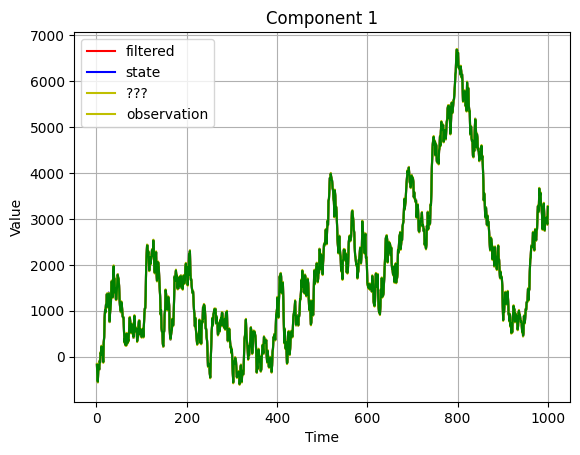

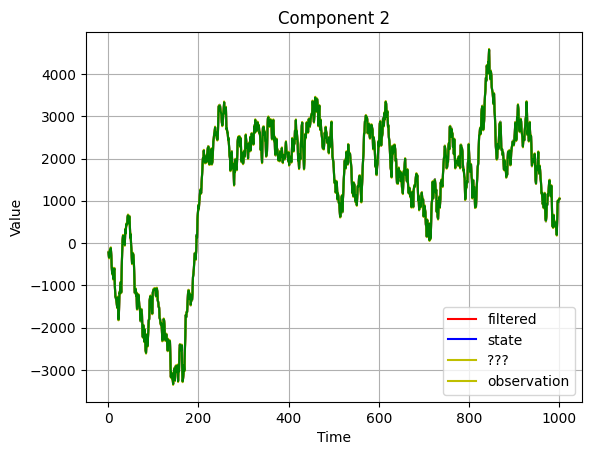

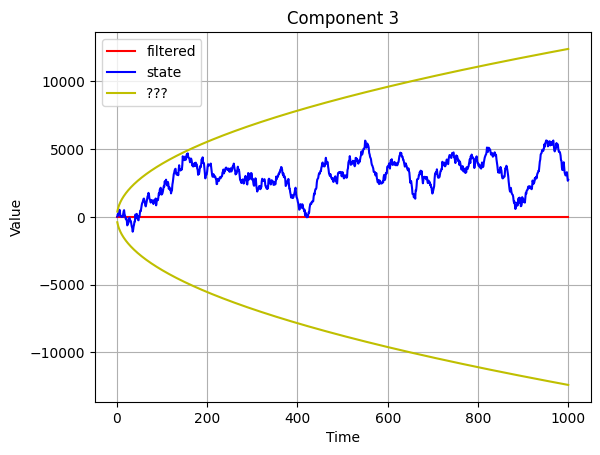

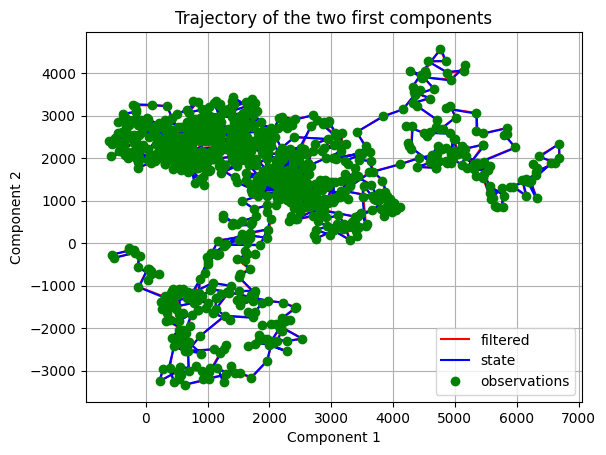

In [95]:
# Priors sur l'etat initial
m_0 = np.array([0, 0, 0])
P_0 = 100 * np.eye(3)

# Filtrage
M, Parray = kalman_filter(Y, m_0, P_0, Phi, Psi, Q, R)

# Visualisation
plt.close('all')
for i in range(3):
    plt.figure(i+1)
    plt.plot(range(1, T+1), M[:, i], 'r', label='filtered')
    plt.plot(range(1, T+1), X[:, i], 'b', label='state')
    sd = np.sqrt(Parray[i, i, :])
    plt.plot(range(1, T+1), M[:, i] + 1.96 * sd, 'y')
    plt.plot(range(1, T+1), M[:, i] - 1.96 * sd, 'y')
    if i < 2:
        plt.plot(range(1, T+1), Y[:, i], 'g')
        plt.legend(['filtered', 'state', '???', 'observation'])
    else:
        plt.legend(['filtered', 'state', '???'])
    plt.title(f'Component {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

plt.figure(4)
plt.plot(M[:, 0], M[:, 1], 'r', label='filtered')
plt.plot(X[:, 0], X[:, 1], 'b', label='state')
plt.plot(Y[:, 0], Y[:, 1], 'og', label='observations')
plt.title('Trajectory of the two first components')
plt.legend()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

2.4)
Les traits jaunes represententent l'intervalle de confiance à 95% (1.96 est le quantile de 0.95 pour la normale centré réduite) dans lequel l'état réel se trouve. Ils encadrent la marche filtré par Kalman. \
Dans notre génération avec T=100, dans les 2 composantes, l'état réel reste toujours dans cet intervalle de confiance. 

2.5)
Quand T augmente, l'état réel a plus tendance à sortir de l'intervalle de confiance (c'est normal car c'est une question de proba), cependant l'estimation reste quand même bonne. \
En augmentant $\sigma$, l'estimation filtré reste très bonne même si les observations sont éloignés de l'état réel. En effet l'état filtré s'éloigne aussi des observations mais reste assez proche de l'état réel : l'intervalle de confiance à 95% reste le même en augmentant $\sigma$. \
Pour $\tau $ qui augmente, l'intervalle de confiance à 95% s'aggrandit aussi due au plus grandes varaitions de l'état réel, cependant l'estimation filtré reste très proche de l'état réel. 

(et inversement dans chaque cas lorsque que le paramètre diminue)



# 3 - Modification of the observation

The observation problem is modified as follows: instead of observing the 'projection' of the random walk onto the plane $(O, x1, x2)$, we observe its projection onto a plane that has undergone two successive rotations of angles $\varphi_B$ and $\vartheta_B$ around the axes $(Oy)$ and $(Ox)$. This modification corresponds to a new observation matrix $\Psi$ defined as follows (with arbitrary values of $\varphi_B$ and $\vartheta_B$) 

In [103]:
# Define rotation angles
azi_Psi = np.pi / 3
elev_Psi = np.pi / 3
Psi = np.array([[1,0,0],[0,1,0]])
# Define rotation matrices
Rx = np.array([[1, 0, 0],
               [0, np.cos(azi_Psi), -np.sin(azi_Psi)],
               [0, np.sin(azi_Psi), np.cos(azi_Psi)]])
Ry = np.array([[np.cos(elev_Psi), 0, -np.sin(elev_Psi)],
               [0, 1, 0],
               [np.sin(elev_Psi), 0, np.cos(elev_Psi)]])

Psi = Psi @ Rx @ Ry
print(Psi)

[[ 0.5        0.        -0.8660254]
 [-0.75       0.5       -0.4330127]]


Questions:
3. Explain briefly what is the difference with the previous observation matrix. (you can use for instance the filtering results of the different component to explain what you observe)

3) La grande difference avec cette nouvelle matrice $\Psi$ est que les composantes des $X_k$ sont croisées dans l'observation $Y_k$, ainsi les observations ne suivront plus directement la trajectoires de l'état réel, de plus la reconstitution sera alors plus complexes dues à le redondance des variances $\epsilon_{k,i}$ dans l'observation $Y_k$. Plus concrétement dans les calculs, on observe que c'est la matrice de gain de Kalman qui va être largement modifié par le changement de $\Psi$.

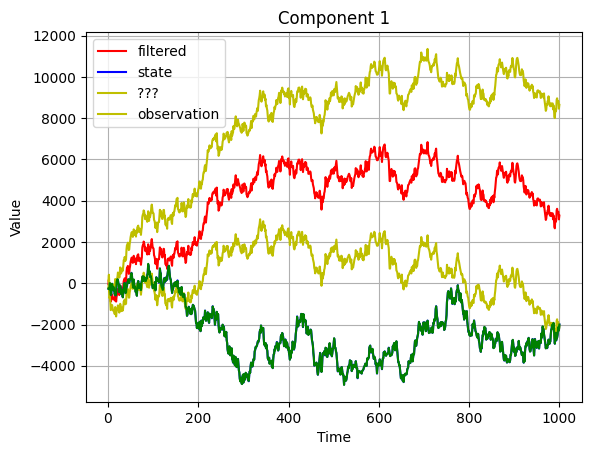

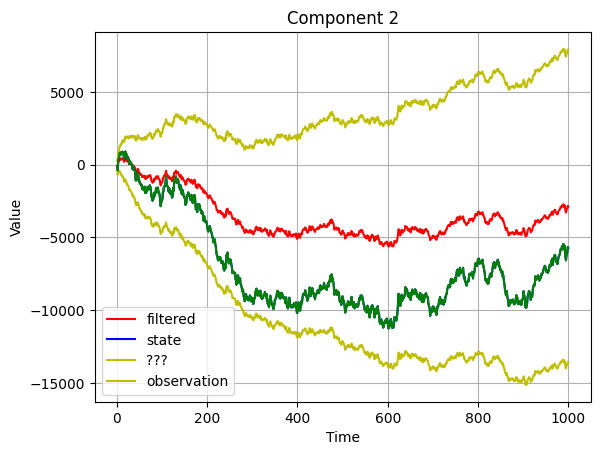

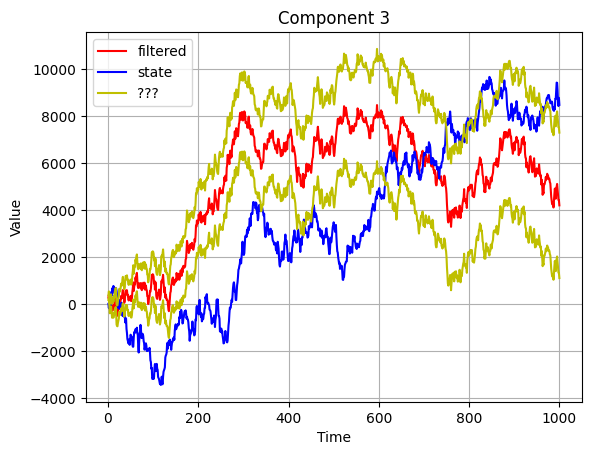

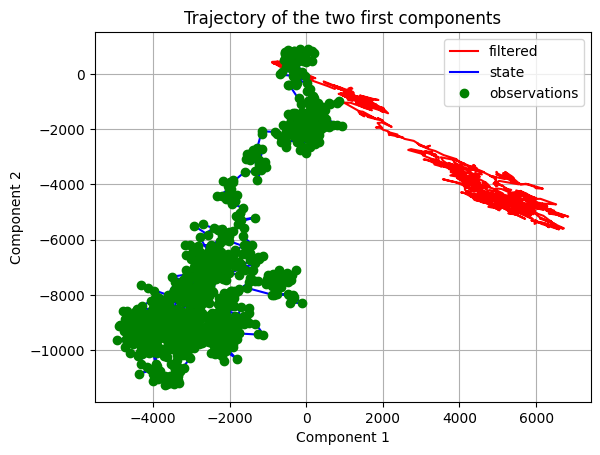

In [104]:
# Priors sur l'etat initial
m_0 = np.array([0, 0, 0])
P_0 = 100 * np.eye(3)

# Filtrage
M, Parray = kalman_filter(Y, m_0, P_0, Phi, Psi, Q, R)

# Visualisation
plt.close('all')
for i in range(3):
    plt.figure(i+1)
    plt.plot(range(1, T+1), M[:, i], 'r', label='filtered')
    plt.plot(range(1, T+1), X[:, i], 'b', label='state')
    sd = np.sqrt(Parray[i, i, :])
    plt.plot(range(1, T+1), M[:, i] + 1.96 * sd, 'y')
    plt.plot(range(1, T+1), M[:, i] - 1.96 * sd, 'y')
    if i < 2:
        plt.plot(range(1, T+1), Y[:, i], 'g')
        plt.legend(['filtered', 'state', '???', 'observation'])
    else:
        plt.legend(['filtered', 'state', '???'])
    plt.title(f'Component {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

plt.figure(4)
plt.plot(M[:, 0], M[:, 1], 'r', label='filtered')
plt.plot(X[:, 0], X[:, 1], 'b', label='state')
plt.plot(Y[:, 0], Y[:, 1], 'og', label='observations')
plt.title('Trajectory of the two first components')
plt.legend()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()